In [4]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-ntvio2es
  Running command git clone -q https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-ntvio2es
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-jz56c0ht/pyfolio_4a3e5df2c7bd49cd8cb40a22cf358f68
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-jz56c0ht/pyfolio_4a3e5df2c7bd49cd8cb40a22cf358f68
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-jz56c0ht/elegantrl_76c51f90496e4db8882dfd3f0b2fb0ed
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-jz56c0ht/elegantrl_76c51f90496e4db8882dfd3f0b2fb0ed
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 174 kB 31.7 MB/s 
     |████████████████████████████████| 54.7 MB 46 kB/s 
     |████████████████████████████████| 1.8 MB 35.4 MB/s 
     |█████████

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading_cashpenalty import StockTradingEnvCashpenalty
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts


import sys
sys.path.append("../FinRL-Library")

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [7]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [8]:
print(config.START_DATE)
print(config.END_DATE)
print(config.DOW_30_TICKER)

2009-01-01
2021-10-31
['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [6]:
from google.colab import files
files.upload()

{}

In [42]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-01-01',
                     ticker_list = ['AAPL']).fetch_data()

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3021, 8)


In [43]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.778781,746015200,AAPL,4
1,2009-01-05,3.327500,3.435000,3.311071,2.896057,1181608400,AAPL,0
2,2009-01-06,3.426786,3.470357,3.299643,2.848290,1289310400,AAPL,1
3,2009-01-07,3.278929,3.303571,3.223571,2.786743,753048800,AAPL,2
4,2009-01-08,3.229643,3.326786,3.215714,2.838491,673500800,AAPL,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3021 non-null   object 
 1   open    3021 non-null   float64
 2   high    3021 non-null   float64
 3   low     3021 non-null   float64
 4   close   3021 non-null   float64
 5   volume  3021 non-null   int64  
 6   tic     3021 non-null   object 
 7   day     3021 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 188.9+ KB


In [10]:
df2 = pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
apple_twitter_sentiment_df = pd.read_csv('/content/drive/My Drive/Reinforcement_Learning/Apple-Twitter-Sentiment-DFE.csv', encoding='latin-1')

In [15]:
apple_twitter_sentiment_df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

In [16]:
apple_twitter_sentiment_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [26]:
apple_twitter_sentiment_df['sentiment'].unique()

array(['3', '5', '1', 'not_relevant'], dtype=object)

In [30]:
print(len(apple_twitter_sentiment_df[apple_twitter_sentiment_df['sentiment'] == '3']), len(apple_twitter_sentiment_df[apple_twitter_sentiment_df['sentiment'] == '1']), len(apple_twitter_sentiment_df[apple_twitter_sentiment_df['sentiment'] == '5']), len(apple_twitter_sentiment_df[apple_twitter_sentiment_df['sentiment'] == 'not_relevant']))

2162 1219 423 82


In [10]:
combined_news_df = pd.read_csv('/content/drive/My Drive/Reinforcement_Learning/Combined_News_DJIA.csv')

In [11]:
combined_news_df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [12]:
combined_news_df = combined_news_df.rename(columns={"Date": "date"})

In [13]:
combined_news_df.head(3)

,date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [14]:
combined_news_df.info

<bound method DataFrame.info of             date  ...                                              Top25
0     2008-08-08  ...           b"No Help for Mexico's Kidnapping Surge"
1     2008-08-11  ...  b"So this is what it's come to: trading sex fo...
2     2008-08-12  ...  b"BBC NEWS | Asia-Pacific | Extinction 'by man...
3     2008-08-13  ...  b'2006: Nobel laureate Aleksander Solzhenitsyn...
4     2008-08-14  ...  b'Philippines : Peace Advocate say Muslims nee...
...          ...  ...                                                ...
1984  2016-06-27  ...  Pakistani clerics declare transgender marriage...
1985  2016-06-28  ...  Mexico's security forces routinely use 'sexual...
1986  2016-06-29  ...  Tiny New Zealand town with 'too many jobs' lau...
1987  2016-06-30  ...  Law Enforcement Sources: Gun Used in Paris Ter...
1988  2016-07-01  ...  Ozone layer hole seems to be healing - US &amp...

[1989 rows x 27 columns]>

In [15]:
df_gs = YahooDownloader(start_date = '2008-08-08',
                     end_date = '2016-07-01',
                     ticker_list = ['GS']).fetch_data()

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1988, 8)


In [16]:
df_gs.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day'], dtype='object')

In [17]:
merged_df = pd.merge(combined_news_df,df_gs,on='date')

In [18]:
merged_df

,date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,open,high,low,close,volume,tic,day
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",172.759995,178.449997,172.020004,145.502792,6634600,GS,4
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",176.380005,183.199997,175.070007,147.198044,8798500,GS,0
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...

In [19]:
merged_df.columns

Index(['date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'open', 'high', 'low', 'close', 'volume', 'tic',
       'day'],
      dtype='object')

In [20]:
import nltk

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("This is cool!!!")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'compound': 0.4898, 'neg': 0.0, 'neu': 0.386, 'pos': 0.614}

In [23]:
analyzer.polarity_scores("This is great!!!")

{'compound': 0.7163, 'neg': 0.0, 'neu': 0.287, 'pos': 0.713}

In [24]:
analyzer.polarity_scores("This is the worst!!!")

{'compound': -0.7163, 'neg': 0.624, 'neu': 0.376, 'pos': 0.0}

In [25]:
from collections import defaultdict

In [26]:
polarity_scores = defaultdict(list)
for index, row in merged_df.iterrows():
    sentiment_list = []
    for col_name in ['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
      'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
      'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
      'Top24', 'Top25']:
          try:
              polarity_scores[col_name + '_Sentiment'].append(analyzer.polarity_scores(str(row[col_name]))['compound'])
          except Exception as e:
              print(e)
              polarity_scores[col_name + '_Sentiment'].append(0)
    polarity_scores['date'].append(row['date'])

In [27]:
polarity_scores_df = pd.DataFrame.from_dict(polarity_scores)

In [28]:
polarity_scores_df.columns

Index(['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment', 'Top4_Sentiment',
       'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment', 'Top8_Sentiment',
       'Top9_Sentiment', 'Top10_Sentiment', 'Top11_Sentiment',
       'Top12_Sentiment', 'Top13_Sentiment', 'Top14_Sentiment',
       'Top15_Sentiment', 'Top16_Sentiment', 'Top17_Sentiment',
       'Top18_Sentiment', 'Top19_Sentiment', 'Top20_Sentiment',
       'Top21_Sentiment', 'Top22_Sentiment', 'Top23_Sentiment',
       'Top24_Sentiment', 'Top25_Sentiment', 'date'],
      dtype='object')

In [29]:
sentiment_analysed_df = pd.merge(merged_df,polarity_scores_df,on='date')

In [30]:
sentiment_analysed_df.columns

Index(['date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'open', 'high', 'low', 'close', 'volume', 'tic',
       'day', 'Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment'],
      dtype='object')

In [31]:
sentiment_analysed_df.to_csv('/content/drive/My Drive/Reinforcement_Learning/goldman_sachs_sentiment_analysed.csv', sep='\t')

In [32]:
correlation_col_vals = sentiment_analysed_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].corrwith(sentiment_analysed_df['close'])

In [33]:
correlation_col_vals

Top1_Sentiment     0.013929
Top2_Sentiment     0.042994
Top3_Sentiment     0.033973
Top4_Sentiment     0.032728
Top5_Sentiment     0.034338
Top6_Sentiment     0.014762
Top7_Sentiment     0.050972
Top8_Sentiment     0.031848
Top9_Sentiment     0.051114
Top10_Sentiment    0.050284
Top11_Sentiment    0.027123
Top12_Sentiment    0.031005
Top13_Sentiment    0.034824
Top14_Sentiment    0.028015
Top15_Sentiment    0.017281
Top16_Sentiment    0.017521
Top17_Sentiment    0.056295
Top18_Sentiment    0.048215
Top19_Sentiment    0.019237
Top20_Sentiment    0.077483
Top21_Sentiment   -0.011592
Top22_Sentiment    0.018245
Top23_Sentiment    0.015844
Top24_Sentiment    0.019478
Top25_Sentiment    0.018717
dtype: float64

In [34]:
df = pd.DataFrame({'A': [1,2,3], 'B':[7,12,32]})
df.sum(axis = 1)

0     8
1    14
2    35
dtype: int64

In [35]:
df[['A', 'B']].sum(axis=1)

0     8
1    14
2    35
dtype: int64

In [36]:
normalized_df=(df-df.mean())/df.std()
normalized_df

,A,B
0,-1.0,-0.755929
1,0.0,-0.377964
2,1.0,1.133893


In [38]:
sentiment_analysed_df['sentiment_mean'] = sentiment_analysed_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].sum(axis=1) / 25

In [100]:
sentiment_analysed_df['sentiment_mean']

0      -7.7360
1      -3.0185
2      -5.4389
3      -4.2181
4      -3.2687
         ...  
1983   -1.1708
1984   -3.5664
1985   -1.6828
1986   -6.0135
1987   -7.0149
Name: sentiment_mean, Length: 1988, dtype: float64

In [39]:
sentiment_analysed_df['sentiment_mean']

0      -0.309440
1      -0.120740
2      -0.217556
3      -0.168724
4      -0.130748
          ...   
1983   -0.046832
1984   -0.142656
1985   -0.067312
1986   -0.240540
1987   -0.280596
Name: sentiment_mean, Length: 1988, dtype: float64

In [40]:
gs_sentiment_analysed_normalized_df = (sentiment_analysed_df - sentiment_analysed_df.mean())/(sentiment_analysed_df.std())

In [41]:
correlation_col_vals_gs = gs_sentiment_analysed_normalized_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].corrwith(gs_sentiment_analysed_normalized_df['close'])

In [42]:
correlation_col_vals_gs

Top1_Sentiment     0.013929
Top2_Sentiment     0.042994
Top3_Sentiment     0.033973
Top4_Sentiment     0.032728
Top5_Sentiment     0.034338
Top6_Sentiment     0.014762
Top7_Sentiment     0.050972
Top8_Sentiment     0.031848
Top9_Sentiment     0.051114
Top10_Sentiment    0.050284
Top11_Sentiment    0.027123
Top12_Sentiment    0.031005
Top13_Sentiment    0.034824
Top14_Sentiment    0.028015
Top15_Sentiment    0.017281
Top16_Sentiment    0.017521
Top17_Sentiment    0.056295
Top18_Sentiment    0.048215
Top19_Sentiment    0.019237
Top20_Sentiment    0.077483
Top21_Sentiment   -0.011592
Top22_Sentiment    0.018245
Top23_Sentiment    0.015844
Top24_Sentiment    0.019478
Top25_Sentiment    0.018717
dtype: float64

In [43]:
sentiment_analysed_df.head(3)

,date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,open,high,low,close,volume,tic,day,Top1_Sentiment,Top2_Sentiment,Top3_Sentiment,Top4_Sentiment,Top5_Sentiment,Top6_Sentiment,Top7_Sentiment,Top8_Sentiment,Top9_Sentiment,Top10_Sentiment,Top11_Sentiment,Top12_Sentiment,Top13_Sentiment,Top14_Sentiment,Top15_Sentiment,Top16_Sentiment,Top17_Sentiment,Top18_Sentiment,Top19_Sentiment,Top20_Sentiment,Top21_Sentiment,Top22_Sentiment,Top23_Sentiment,Top24_Sentiment,Top25_Sentiment,sentiment_mean
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",172.759995,178.449997,172.020004,145.502792,6634600,GS,4,-0.5994,0.0000,-0.3612,-0.7089,-0.926,0.0000,-0.2732,0.2144,-0.5719,-0.5994,-0.6486,-0.2263,-0.7645,0.0000,-0.5994,0.0,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019,-0.309440
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",176.380005,183.199997,175.070007,147.198044,8798500,GS,0,0.8156,-0.3182,0.4404,-0.1965,0.000,-0.4939,-0.5106,-0.0772,-0.6688,-0.3400,0.0000,0.7783,0.0000,-0.3818,-0.1027,0.0,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000,-0.120740
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US militar

In [44]:
gs_sentiment_analysed_normalized_df['mean_polarity'] = (gs_sentiment_analysed_normalized_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].sum(axis=1))/ 25

In [45]:
gs_sentiment_analysed_normalized_df['mean_polarity']

0      -0.224868
1       0.203179
2      -0.009824
3       0.100624
4       0.184156
          ...   
1983    0.375287
1984    0.159219
1985    0.326995
1986   -0.069522
1987   -0.162144
Name: mean_polarity, Length: 1988, dtype: float64

In [46]:
sentiment_analysed_df.head(3)

,date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,open,high,low,close,volume,tic,day,Top1_Sentiment,Top2_Sentiment,Top3_Sentiment,Top4_Sentiment,Top5_Sentiment,Top6_Sentiment,Top7_Sentiment,Top8_Sentiment,Top9_Sentiment,Top10_Sentiment,Top11_Sentiment,Top12_Sentiment,Top13_Sentiment,Top14_Sentiment,Top15_Sentiment,Top16_Sentiment,Top17_Sentiment,Top18_Sentiment,Top19_Sentiment,Top20_Sentiment,Top21_Sentiment,Top22_Sentiment,Top23_Sentiment,Top24_Sentiment,Top25_Sentiment,sentiment_mean
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",172.759995,178.449997,172.020004,145.502792,6634600,GS,4,-0.5994,0.0000,-0.3612,-0.7089,-0.926,0.0000,-0.2732,0.2144,-0.5719,-0.5994,-0.6486,-0.2263,-0.7645,0.0000,-0.5994,0.0,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019,-0.309440
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",176.380005,183.199997,175.070007,147.198044,8798500,GS,0,0.8156,-0.3182,0.4404,-0.1965,0.000,-0.4939,-0.5106,-0.0772,-0.6688,-0.3400,0.0000,0.7783,0.0000,-0.3818,-0.1027,0.0,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000,-0.120740
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US militar

In [47]:
sentiment_analysed_df['mean_polarity'] = gs_sentiment_analysed_normalized_df['mean_polarity']

In [48]:
gs_sentiment_analysed_normalized_df['mean_polarity'].corr(gs_sentiment_analysed_normalized_df['close'])

0.14594328416675667

In [49]:
sentiment_analysed_df['mean_polarity'].corr(sentiment_analysed_df['close'])

0.1459432841667565

In [50]:
sentiment_analysed_numerical_df = sentiment_analysed_df[sentiment_analysed_df.columns.difference(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
      'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
      'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
      'Top24', 'Top25', 'Label', 'date'])]

In [51]:
sentiment_analysed_numerical_df.columns

Index(['Top10_Sentiment', 'Top11_Sentiment', 'Top12_Sentiment',
       'Top13_Sentiment', 'Top14_Sentiment', 'Top15_Sentiment',
       'Top16_Sentiment', 'Top17_Sentiment', 'Top18_Sentiment',
       'Top19_Sentiment', 'Top1_Sentiment', 'Top20_Sentiment',
       'Top21_Sentiment', 'Top22_Sentiment', 'Top23_Sentiment',
       'Top24_Sentiment', 'Top25_Sentiment', 'Top2_Sentiment',
       'Top3_Sentiment', 'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment',
       'Top7_Sentiment', 'Top8_Sentiment', 'Top9_Sentiment', 'close', 'day',
       'high', 'low', 'mean_polarity', 'open', 'sentiment_mean', 'tic',
       'volume'],
      dtype='object')

In [52]:
sentiment_analysed_rolling_df = sentiment_analysed_numerical_df.rolling(6).mean()

In [53]:
sentiment_analysed_rolling_df = sentiment_analysed_rolling_df[5:]

In [54]:
rolling_df_correlation_col_vals = sentiment_analysed_rolling_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].corrwith(sentiment_analysed_rolling_df['close'])

In [55]:
rolling_df_correlation_col_vals

Top1_Sentiment     0.028165
Top2_Sentiment     0.100621
Top3_Sentiment     0.085871
Top4_Sentiment     0.085523
Top5_Sentiment     0.086122
Top6_Sentiment     0.028788
Top7_Sentiment     0.128979
Top8_Sentiment     0.065992
Top9_Sentiment     0.127226
Top10_Sentiment    0.127529
Top11_Sentiment    0.058591
Top12_Sentiment    0.070346
Top13_Sentiment    0.091790
Top14_Sentiment    0.065012
Top15_Sentiment    0.045271
Top16_Sentiment    0.044303
Top17_Sentiment    0.143068
Top18_Sentiment    0.113483
Top19_Sentiment    0.046526
Top20_Sentiment    0.188664
Top21_Sentiment   -0.028747
Top22_Sentiment    0.042020
Top23_Sentiment    0.035478
Top24_Sentiment    0.041584
Top25_Sentiment    0.052470
dtype: float64

In [56]:
sentiment_analysed_rolling_df['mean_polarity'] = (sentiment_analysed_rolling_df[['Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment']].sum(axis=1))/ 25

In [57]:
sentiment_analysed_rolling_df['mean_polarity'].corr(sentiment_analysed_rolling_df['close'])

0.298673144470886

In [58]:
### ------------------- LSTM Training ------------------------

In [59]:
import torch
import torch.nn as nn
import seaborn as sns
%matplotlib inline

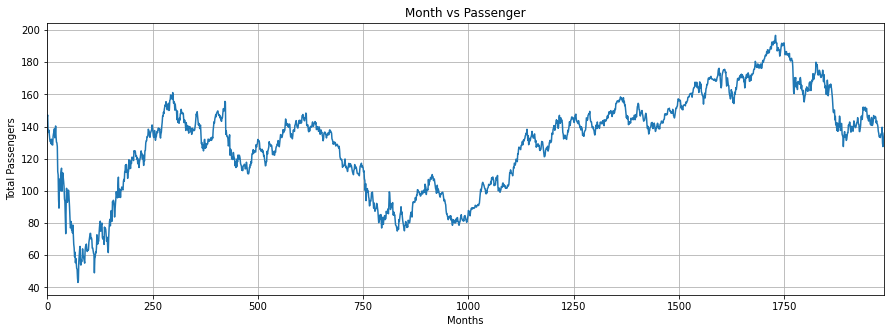

In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(sentiment_analysed_df['close'])

In [61]:
sentiment_analysed_df.shape

(1988, 61)

In [81]:
test_data_size = 50
train_data = sentiment_analysed_df[:-test_data_size]
test_data = sentiment_analysed_df[-test_data_size:]

In [82]:
print(train_data.shape, test_data.shape)

(1938, 61) (50, 61)


In [83]:
sentiment_analysed_df.columns

Index(['date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'open', 'high', 'low', 'close', 'volume', 'tic',
       'day', 'Top1_Sentiment', 'Top2_Sentiment', 'Top3_Sentiment',
       'Top4_Sentiment', 'Top5_Sentiment', 'Top6_Sentiment', 'Top7_Sentiment',
       'Top8_Sentiment', 'Top9_Sentiment', 'Top10_Sentiment',
       'Top11_Sentiment', 'Top12_Sentiment', 'Top13_Sentiment',
       'Top14_Sentiment', 'Top15_Sentiment', 'Top16_Sentiment',
       'Top17_Sentiment', 'Top18_Sentiment', 'Top19_Sentiment',
       'Top20_Sentiment', 'Top21_Sentiment', 'Top22_Sentiment',
       'Top23_Sentiment', 'Top24_Sentiment', 'Top25_Sentiment',
       'sentiment_mean', 'mean_polarity'],
      dtype='object')

In [84]:
sentiment_analysed_df['sentiment_mean']

0      -0.309440
1      -0.120740
2      -0.217556
3      -0.168724
4      -0.130748
          ...   
1983   -0.046832
1984   -0.142656
1985   -0.067312
1986   -0.240540
1987   -0.280596
Name: sentiment_mean, Length: 1988, dtype: float64

In [85]:
sentiment_analysed_df['mean_polarity']

0      -0.224868
1       0.203179
2      -0.009824
3       0.100624
4       0.184156
          ...   
1983    0.375287
1984    0.159219
1985    0.326995
1986   -0.069522
1987   -0.162144
Name: mean_polarity, Length: 1988, dtype: float64

In [86]:
train_window = 7

In [89]:
train_data_tensor = torch.FloatTensor(train_data['sentiment_mean']).view(-1)
train_label_tensor = torch.FloatTensor(train_data['close']).view(-1)

test_data_tensor = torch.FloatTensor(test_data['sentiment_mean'].to_numpy()).view(-1)
test_label_tensor = torch.FloatTensor(test_data['close'].to_numpy()).view(-1)

In [67]:
def create_inout_sequences(input_data, input_label, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_label[i:i+tw]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [90]:
train_inout_seq = create_inout_sequences(train_data_tensor, train_label_tensor, train_window)

In [91]:
len(train_inout_seq)

1931

In [92]:
train_inout_seq[0]

(tensor([-0.3094, -0.1207, -0.2176, -0.1687, -0.1307, -0.1607, -0.2042]),
 tensor([145.5028, 147.1980, 138.3496, 136.3649, 137.7625, 134.9425, 132.3459]))

In [93]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [129]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [130]:
print(model)


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [131]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   1 loss: 182.75051880
epoch:  26 loss: 18.14686012
epoch:  51 loss: 15.42160225
epoch:  76 loss: 27.27824211
epoch: 101 loss: 11.40351868
epoch: 126 loss: 10.89437008
epoch: 149 loss: 13.3575115204


In [132]:
fut_pred = 50

test_inputs = train_data_tensor[-train_window:].tolist()
print(test_inputs)

[-0.12658800184726715, -0.2613320052623749, -0.20548400282859802, -0.13953599333763123, -0.2092439979314804, -0.1978680044412613, -0.12335199862718582]


In [133]:
test_data_tensor

tensor([-0.0726, -0.1244, -0.2590, -0.2242, -0.2160, -0.1533, -0.1894, -0.3220,
        -0.0552, -0.3124, -0.1658, -0.2625, -0.1172, -0.3144, -0.0974, -0.2323,
        -0.0684, -0.2002, -0.1576, -0.1546, -0.2223, -0.1779, -0.3199, -0.1493,
        -0.3479, -0.2377, -0.2491, -0.1840, -0.3379, -0.2741, -0.1300, -0.2572,
        -0.1205, -0.0914, -0.0881, -0.1313, -0.1555, -0.1523, -0.3035, -0.2706,
        -0.2955, -0.3503, -0.3576, -0.0954, -0.1580, -0.0468, -0.1427, -0.0673,
        -0.2405, -0.2806])

In [146]:
test_inputs = test_data_tensor[1:train_window+1].tolist()
print(test_inputs)

[-0.12436000257730484, -0.2589559853076935, -0.22419199347496033, -0.21602800488471985, -0.1532759964466095, -0.18942399322986603, -0.32204800844192505]


In [147]:
test_data_labels = []
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())
        break

In [148]:
len(test_inputs)

8

In [149]:
test_inputs

[-0.12436000257730484,
 -0.2589559853076935,
 -0.22419199347496033,
 -0.21602800488471985,
 -0.1532759964466095,
 -0.18942399322986603,
 -0.32204800844192505,
 149.66653442382812]

In [150]:
test_inputs[-fut_pred:]

[-0.12436000257730484,
 -0.2589559853076935,
 -0.22419199347496033,
 -0.21602800488471985,
 -0.1532759964466095,
 -0.18942399322986603,
 -0.32204800844192505,
 149.66653442382812]

In [115]:
test_data_tensor[0]

tensor(-0.0726)

In [138]:
test_label_tensor[0]

tensor(150.5433)

In [117]:
test_label_tensor[1]

tensor(151.8455)

In [123]:
len(test_inputs)

8

In [151]:
test_inputs

[-0.12436000257730484,
 -0.2589559853076935,
 -0.22419199347496033,
 -0.21602800488471985,
 -0.1532759964466095,
 -0.18942399322986603,
 -0.32204800844192505,
 149.66653442382812]

In [145]:
test_label_tensor[7]

tensor(151.3264)

In [152]:
test_label_tensor[8]

tensor(148.5582)

In [160]:
test_data_labels = []
model.eval()

for i in range(fut_pred - train_window):
    test_inputs = test_data_tensor[i:train_window+i].tolist()
    seq = torch.FloatTensor(test_inputs)
    print(i, len(seq))
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_data_labels.append(model(seq).item())

0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
11 7
12 7
13 7
14 7
15 7
16 7
17 7
18 7
19 7
20 7
21 7
22 7
23 7
24 7
25 7
26 7
27 7
28 7
29 7
30 7
31 7
32 7
33 7
34 7
35 7
36 7
37 7
38 7
39 7
40 7
41 7
42 7


In [159]:
test_data_tensor

tensor([-0.0726, -0.1244, -0.2590, -0.2242, -0.2160, -0.1533, -0.1894, -0.3220,
        -0.0552, -0.3124, -0.1658, -0.2625, -0.1172, -0.3144, -0.0974, -0.2323,
        -0.0684, -0.2002, -0.1576, -0.1546, -0.2223, -0.1779, -0.3199, -0.1493,
        -0.3479, -0.2377, -0.2491, -0.1840, -0.3379, -0.2741, -0.1300, -0.2572,
        -0.1205, -0.0914, -0.0881, -0.1313, -0.1555, -0.1523, -0.3035, -0.2706,
        -0.2955, -0.3503, -0.3576, -0.0954, -0.1580, -0.0468, -0.1427, -0.0673,
        -0.2405, -0.2806])

In [161]:
test_data_labels

[131.66659545898438,
 122.26004028320312,
 132.46498107910156,
 122.46257019042969,
 131.81414794921875,
 122.18658447265625,
 133.27606201171875,
 121.17816162109375,
 133.40325927734375,
 120.83106994628906,
 133.31930541992188,
 120.563232421875,
 133.7533721923828,
 120.6434326171875,
 130.77427673339844,
 131.47845458984375,
 131.0938720703125,
 128.1872100830078,
 121.65675354003906,
 120.154541015625,
 120.56101989746094,
 125.55349731445312,
 127.4322509765625,
 127.92845153808594,
 128.18528747558594,
 133.52850341796875,
 139.18170166015625,
 139.20054626464844,
 135.7280731201172,
 127.43460083007812,
 126.04103088378906,
 129.73802185058594,
 130.86041259765625,
 130.44732666015625,
 128.60484313964844,
 122.18443298339844,
 119.94029235839844,
 118.80783081054688,
 124.53572082519531,
 126.87445068359375,
 129.53819274902344,
 132.20352172851562,
 140.7017059326172]

In [163]:
test_labels = list(test_label_tensor[7:])

In [164]:
print(len(test_data_labels), len(test_labels))

43 43


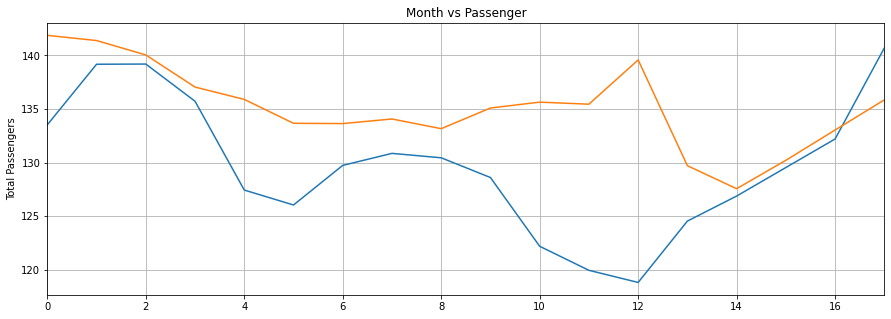

In [167]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(test_data_labels[25:])
plt.plot(test_labels[25:])
plt.show()

In [170]:
torch.save(model, "/content/drive/My Drive/Reinforcement_Learning/complete_model.pt")

In [172]:
torch.save(model.state_dict(), "/content/drive/My Drive/Reinforcement_Learning/state_dict_model.pt")